In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#ds=pd.read_csv("E:\cb\mljan19dwk\Datasets\mnist\train.csv")
ds=pd.read_csv("E:/cb/mljan19dwk/Datasets/mnist/train.csv")


In [3]:
def get_one_hot_vector(labels):
        classes=len(np.unique(labels))
        vectors=np.zeros((labels.shape[0],classes))
        for i,l in enumerate(labels):
            vectors[i,l]=1
        return vectors
 

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(ds.values[:,1:], ds.values[:,0], test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


In [6]:
ytrain=get_one_hot_vector(y_train)
ytrain.shape

(33600, 10)

In [7]:
class neuralnetwork():
    def __init__(self,x,y): #y is one hot vector # preprocessing
        self.x=x
        self.y=y
        self.m=x.shape[0]
        self.n=self.x.shape[1]
        self.outputdim=10  #len(np.unique(self.y, return_counts=False))
        self.a1=0
        self.a2=0
        
        
        self.w1=np.random.randn(self.n,256)
        self.b1=np.random.random((1,256))
        
        self.w2=np.random.randn(256,64)
        self.b2=np.random.random((1,64))
        
        self.w3=np.random.randn(64,self.outputdim)
        self.b3=np.random.random((1,self.outputdim))

        
        
        
    def forward(self,x):        
        z1=x.dot(self.w1)+self.b1
        self.a1=self.sigmoid(z1)
        
        z2=self.a1.dot(self.w2)+self.b2
        self.a2=self.sigmoid(z2)
        
        z3=self.a2.dot(self.w3)+self.b3
        yhat=self.softmax(z3)

        
        return yhat
        
        
    def backward_and_update(self,x,y,yhat,lrate=0.01):
        
        delta3=yhat-y
        dldw3=self.a2.T.dot(delta3)
        dldb3=delta3.sum(axis=0,keepdims=True)
        
        delta2=delta3.dot(self.w3.T)*(self.a2*(1-self.a2))
        dldw2=self.a1.T.dot(delta2)
        dldb2=delta2.sum(axis=0,keepdims=True)
        
        delta1=delta2.dot(self.w2.T)*(self.a1*(1-self.a1))
        dldw1=x.T.dot(delta1)
        dldb1=delta1.sum(axis=0,keepdims=True)
        
        #updating values
        self.w3-=lrate*dldw3
        self.b3-=lrate*dldb3
        
        self.w2-=lrate*dldw2
        self.b2-=lrate*dldb2
        
        self.w1-=lrate*dldw1
        self.b1-=lrate*dldb1
        

        
        
       
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def softmax(self,z):
        return  np.exp(z)/(np.exp(z)).sum(axis=1 , keepdims = True)
    
    def predict(self ,x ):
        yhat=self.forward(x)
        return yhat.argmax(axis=1)
    def accu(self,yhat,y):  #pass orignal y , don't pass one hot vector
        return (yhat==y).sum()/y.shape[0]
        
        
        
        
    def loss(self,x,y,yhat):
        return -np.sum(y*(np.log(yhat)))
        
    def train(self,iteration,batchsize,lrate = 0.01):
        loses=[]
        for i in range(iteration):
            size=0
            while size+batchsize<self.m:
                yhat = self.forward(self.x[size:size+batchsize])
                self.backward_and_update(self.x[size:size+batchsize],self.y[size:size+batchsize],yhat,lrate)
                size+=batchsize
            y_total = self.forward(self.x)
            loses.append(self.loss(self.x , self.y , y_total))
            print(loses[-1])
        
        return loses

In [8]:
X_train=X_train/255

nw=neuralnetwork(X_train,ytrain)


In [9]:
losses = nw.train(10,128,0.01)

17277.474176796146
12810.296807673843
10171.047332537648
8501.744650075525
7274.131508719776
6359.723850874502
5605.0877685495725
4997.451557726535
4501.375534635693
4062.8599824330677


In [10]:
print(losses)
losses[-1]

[17277.474176796146, 12810.296807673843, 10171.047332537648, 8501.744650075525, 7274.131508719776, 6359.723850874502, 5605.0877685495725, 4997.451557726535, 4501.375534635693, 4062.8599824330677]


4062.8599824330677

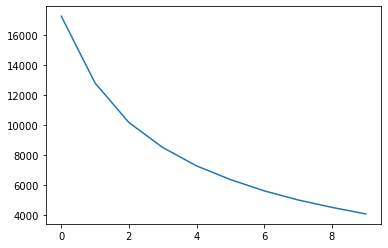

In [11]:
plt.figure()
plt.plot(losses)
plt.show()

In [12]:
yhat=nw.predict(X_test/255)
print(yhat)
#print(yhat.argmax(axis=1).shape)

[0 5 2 ... 0 7 3]


In [14]:
y=y_test
#print(y.shape)
#print(y_test.shape)
acccuracy=nw.accu(yhat,y)
print(acccuracy*100)
#print((yhat==y).sum()/y.shape[0])

91.30952380952381
